This notebooks look at the difference between the MH run of the chain and the true BT (the calculated BT) for various number of people elected.

In [53]:
# adjust the directory so that we can import local source
import sys
import os

# Add the repo root to sys.path
ROOT_REL_PATH_FROM_NB = "../.."
repo_path = os.path.abspath(os.path.join(os.getcwd(), ROOT_REL_PATH_FROM_NB))  # adjust as needed
if repo_path not in sys.path:
    sys.path.insert(0, repo_path)

print(sys.path)

from src.votekit.ballot_generator import name_BradleyTerry 
from src.votekit.pref_interval import PreferenceInterval
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

['/Users/ppeaungvongpakdy/Documents/Research/votekit_bt/VoteKit', '/Users/ppeaungvongpakdy/miniforge3/lib/python312.zip', '/Users/ppeaungvongpakdy/miniforge3/lib/python3.12', '/Users/ppeaungvongpakdy/miniforge3/lib/python3.12/lib-dynload', '', '/Users/ppeaungvongpakdy/miniforge3/lib/python3.12/site-packages', '/Users/ppeaungvongpakdy/choix', '/Users/ppeaungvongpakdy/miniforge3/lib/python3.12/site-packages/setuptools/_vendor']


In [2]:
## run both classic and both types of MCMC runs for maybe 1k, 5k, 10k ballots with various n and see how they compare
## might be worth writing a method to generate data for $n$ candidates so that we can scale $n$ easily
def generate_BT_args(n_cands, alpha=1):
    '''
        generates arguments for name_BradleyTerry with n_cands,
        generates single slate and single bloc, 
    '''
    # num cands goes up to 26
    cands = [chr(ord('a')+i) for i in range(n_cands)]
    bloc_name = "H"
    pref_interval = PreferenceInterval.from_dirichlet(candidates=cands, alpha=alpha)
    pref_intervals_by_bloc = {
        bloc_name: {
            bloc_name : pref_interval
        }
    }
    bloc_voter_prop = {bloc_name: 1}
    cohesion_paramteters = {
        bloc_name: {
            bloc_name: 1
        }
    }
    
    return {
        "candidates": cands,
        "pref_intervals_by_bloc": pref_intervals_by_bloc,
        "bloc_voter_prop" : bloc_voter_prop,
        "cohesion_parameters": cohesion_paramteters
    }


#bt_args = generate_BT_args(5, alpha=1)
#dummy_method(**bt_args)
#test_BT = name_BradleyTerry(**bt_args)

In [35]:
n_cands = 5
## setup the classes
#n_cands = 5
#cands = [chr(ord('a')+i) for i in range(n_cands)] # TODO: need a better way of generating cands which allow us to go larger than 26
#print("candidates: ", cands)

#cands = ["W1", "W2", "C1", "C2"]
# bt = name_BradleyTerry(
#     candidates=cands,
#         pref_intervals_by_bloc={
#             "W": {
#                 "W": PreferenceInterval({"W1": 0.6, "W2": 0.3}),
#                 "C": PreferenceInterval({"C1": 0.05, "C2": 0.05}),
#             },
#             "C": {
#                 "W": PreferenceInterval({"W1": 0.2, "W2": 0.2}),
#                 "C": PreferenceInterval({"C1": 0.3, "C2": 0.3}),
#             },
#         },
#         bloc_voter_prop={"W": 0.9, "C": 0.1 },
#         cohesion_parameters={"W": {"W": 0.5, "C": 0.5}, "C": {"C": 0.9, "W": 0.1}},
#     )

bt = name_BradleyTerry(**generate_BT_args(n_cands=n_cands, alpha=1))

'''
pref_intervals_by_bloc={
            "W": {
                "W": PreferenceInterval({"W1": 0.4, "W2": 0.3}),
                "C": PreferenceInterval({"C1": 0.2, "C2": 0.1}),
            },
            "C": {
                "W": PreferenceInterval({"W1": 0.2, "W2": 0.2}),
                "C": PreferenceInterval({"C1": 0.3, "C2": 0.3}),
            },
        },
        #bloc_voter_prop={"W": 0.7, "C": 0.3},
    '''

def total_variation_distance(P, Q, labels):
    sum = 0 
    for x in labels:
        sum += abs(P[x] - Q[x])
    return (1/2)*sum

In [36]:
# run BT both ways and then process the differences
num_ballots = 10000#int(10e5)
k = 10000
bals_BT_classic = bt.generate_profile(num_ballots).group_ballots()
#bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False)
bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False, on_shortcut_graph=False).group_ballots()
bals_BT_MCMC_shortcut = bt.generate_profile_MCMC(num_ballots, verbose=False, on_shortcut_graph=True).group_ballots()
bals_BT_MCMC_cont_sample = bt.generate_profile_MCMC_cont_sampled(num_ballots, 10000, verbose=False, on_shortcut_graph=False).group_ballots()
bals_BT_MCMC_evenly_spaced = bt.generate_profile_MCMC_evenly_spaced(num_ballots, 10, verbose=False, on_shortcut_graph=False).group_ballots()

Number of ballots prior is 10000
Number of ballots after random selection is 10000
Number of ballots prior is 100001
Number of ballots after random selection is 10001


In [14]:
ballot_rankings_cont_sample = [bal.ranking for bal in bals_BT_MCMC_cont_sample.ballots]
bal_labels_cont_sample = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_cont_sample]
bal_weights_cont_sample = [int(bal.weight) for bal in bals_BT_MCMC_cont_sample.ballots]

False
{'dabec': 0.0865, 'dabce': 0.1326, 'daceb': 0.0383, 'dacbe': 0.0912, 'daecb': 0.0249, 'daebc': 0.0343, 'dcbea': 0.0045, 'dcbae': 0.0174, 'dceba': 0.0022, 'dceab': 0.004, 'dcaeb': 0.0133, 'dcabe': 0.0336, 'dbcea': 0.0078, 'dbcae': 0.0321, 'dbeca': 0.0039, 'dbeac': 0.0111, 'dbaec': 0.0493, 'dbace': 0.0783, 'debca': 0.0018, 'debac': 0.0051, 'decba': 0.0016, 'decab': 0.0022, 'deacb': 0.0055, 'deabc': 0.0094, 'bacde': 0.0014, 'baecd': 0.0002, 'baedc': 0.0005, 'badec': 0.0057, 'badce': 0.0089, 'bcaed': 0.0001, 'bcade': 0.0004, 'bcdea': 0.0003, 'bcdae': 0.0015, 'becad': 0.0001, 'bedac': 0.0003, 'bdcea': 0.0018, 'bdcae': 0.007, 'bdeca': 0.0017, 'bdeac': 0.0034, 'bdaec': 0.0113, 'bdace': 0.0169, 'cabed': 0.0001, 'cabde': 0.0009, 'caebd': 0.0001, 'caedb': 0.0002, 'cadeb': 0.0017, 'cadbe': 0.0025, 'cbeda': 0.0001, 'cbade': 0.0003, 'cbdea': 0.0004, 'cbdae': 0.0007, 'ceadb': 0.0001, 'cdbea': 0.0008, 'cdbae': 0.0041, 'cdeba': 0.0003, 'cdeab': 0.0003, 'cdaeb': 0.003, 'cdabe': 0.0059, 'acbed': 0

8

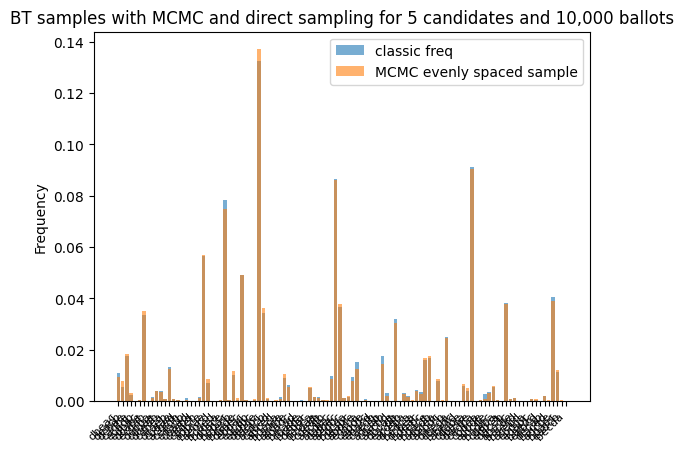

In [37]:
ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]

ballot_rankings_MCMC_shortcut = [bal.ranking for bal in bals_BT_MCMC_shortcut.ballots]
bal_labels_MCMC_shortcut = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC_shortcut]
bal_weights_MCMC_shortcut = [int(bal.weight) for bal in bals_BT_MCMC_shortcut.ballots]

ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]

ballot_rankings_cont_sample = [bal.ranking for bal in bals_BT_MCMC_cont_sample.ballots]
bal_labels_cont_sample = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_cont_sample]
bal_weights_cont_sample = [int(bal.weight) for bal in bals_BT_MCMC_cont_sample.ballots]

ballot_rankings_evenly_spaced = [bal.ranking for bal in bals_BT_MCMC_evenly_spaced.ballots]
bal_labels_evenly_spaced = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_evenly_spaced]
bal_weights_evenly_spaced = [int(bal.weight) for bal in bals_BT_MCMC_evenly_spaced.ballots]

print(bal_labels_classic == bal_labels_MCMC) # labels not in the same order, so set up a map 

# map ballots to weights for each method
bal_rankings_map_classic = {bal_labels_classic[i]: bal_weights_classic[i]/num_ballots for i in range(len(ballot_rankings_classic))}
bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i]/num_ballots for i in range(len(ballot_rankings_MCMC))}
bal_rankings_map_MCMC_shortcut = {bal_labels_MCMC_shortcut[i]: bal_weights_MCMC_shortcut[i]/num_ballots for i in range(len(ballot_rankings_MCMC_shortcut))}
bal_rankings_map_MCMC_cont_sample = {bal_labels_cont_sample[i]: bal_weights_cont_sample[i]/num_ballots for i in range(len(ballot_rankings_cont_sample))}
bal_rankings_map_MCMC_evenly_spaced = {bal_labels_evenly_spaced[i]: bal_weights_evenly_spaced[i]/num_ballots for i in range(len(ballot_rankings_evenly_spaced))}
# convert the bt instance pdfs to a viz-able form

print(bal_rankings_map_classic)
x_labels = list(bal_rankings_map_classic.keys())

all_keys = [list(m.keys()) for m in [
    bal_rankings_map_classic, bal_rankings_map_MCMC, bal_rankings_map_MCMC_shortcut, bal_rankings_map_MCMC_cont_sample, bal_rankings_map_MCMC_evenly_spaced
]]
flattened_keys = [k for sublist in all_keys for k in sublist]

for key in flattened_keys:
    bal_rankings_map_classic.setdefault(key, 0) 
    bal_rankings_map_MCMC.setdefault(key, 0) 
    bal_rankings_map_MCMC_shortcut.setdefault(key, 0) 
    bal_rankings_map_MCMC_cont_sample.setdefault(key, 0)
    bal_rankings_map_MCMC_evenly_spaced.setdefault(key, 0)

all_keys = list(set(bal_rankings_map_classic) | set(bal_rankings_map_MCMC) | set(bal_rankings_map_MCMC_shortcut) | set(bal_rankings_map_MCMC_cont_sample) | set(bal_rankings_map_MCMC_evenly_spaced))

#plt.bar(all_keys, [bal_rankings_map_MCMC[k] for k in all_keys], label="MCMC freq")
#plt.bar(all_keys, [bal_rankings_map_MCMC_shortcut[k] for k in all_keys], label="MCMC shortcut freq", alpha=0.6)
plt.bar(all_keys, [bal_rankings_map_classic[k] for k in all_keys], label="classic freq", alpha=0.6)
#plt.bar(all_keys, [bal_rankings_map_MCMC_cont_sample[k] for k in all_keys], label="MCMC cont sample", alpha=0.6)
plt.bar(all_keys, [bal_rankings_map_MCMC_evenly_spaced[k] for k in all_keys], label="MCMC evenly spaced sample", alpha=0.6)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.legend()
plt.ylabel("Frequency")
plt.title(f"BT samples with MCMC and direct sampling for {n_cands} candidates and {num_ballots:,} ballots")

8


In [52]:
bals_BT_MCMC_evenly_spaced.ballots

(Ranking
 1.) b, 
 2.) d, 
 3.) a, 
 4.) e, 
 5.) c, 
 Weight: 121.0,
 Ranking
 1.) b, 
 2.) d, 
 3.) a, 
 4.) c, 
 5.) e, 
 Weight: 174.0,
 Ranking
 1.) b, 
 2.) d, 
 3.) c, 
 4.) e, 
 5.) a, 
 Weight: 21.0,
 Ranking
 1.) b, 
 2.) d, 
 3.) c, 
 4.) a, 
 5.) e, 
 Weight: 86.0,
 Ranking
 1.) b, 
 2.) d, 
 3.) e, 
 4.) c, 
 5.) a, 
 Weight: 7.0,
 Ranking
 1.) b, 
 2.) d, 
 3.) e, 
 4.) a, 
 5.) c, 
 Weight: 26.0,
 Ranking
 1.) b, 
 2.) a, 
 3.) c, 
 4.) e, 
 5.) d, 
 Weight: 5.0,
 Ranking
 1.) b, 
 2.) a, 
 3.) c, 
 4.) d, 
 5.) e, 
 Weight: 12.0,
 Ranking
 1.) b, 
 2.) a, 
 3.) e, 
 4.) c, 
 5.) d, 
 Weight: 2.0,
 Ranking
 1.) b, 
 2.) a, 
 3.) e, 
 4.) d, 
 5.) c, 
 Weight: 7.0,
 Ranking
 1.) b, 
 2.) a, 
 3.) d, 
 4.) e, 
 5.) c, 
 Weight: 61.0,
 Ranking
 1.) b, 
 2.) a, 
 3.) d, 
 4.) c, 
 5.) e, 
 Weight: 105.0,
 Ranking
 1.) b, 
 2.) c, 
 3.) a, 
 4.) e, 
 5.) d, 
 Weight: 1.0,
 Ranking
 1.) b, 
 2.) c, 
 3.) a, 
 4.) d, 
 5.) e, 
 Weight: 11.0,
 Ranking
 1.) b, 
 2.) c, 
 3.) d, 


In [42]:
a = .08

In [44]:
bal_rankings_map_MCMC_evenly_spaced['dacbe']

0.0904

In [45]:
bal_rankings_map_MCMC_evenly_spaced['dabec']

0.0862

In [46]:
bal_rankings_map_MCMC_evenly_spaced['dabce']

0.1371

['dacbe', 'dabec', 'dabce']

In [43]:
filtered_keys = [k for k, v in bal_rankings_map_MCMC_evenly_spaced.items() if v > a]
print(filtered_keys)

['dacbe', 'dabec', 'dabce']


In [48]:
n = 3  # change to however many you want
smallest_keys = sorted(bal_rankings_map_MCMC_evenly_spaced, key=bal_rankings_map_MCMC_evenly_spaced.get)[:n]
print(smallest_keys)

['becad', 'cbeda', 'ceadb']


In [50]:
smallest_items = sorted(bal_rankings_map_MCMC_evenly_spaced.items(), key=lambda item: item[1])[:n]
print(smallest_items)

[('becad', 0), ('cbeda', 0), ('ceadb', 0)]


In [51]:
# Desired number of lowest nonzero entries
n = 3

# Filter out zero values and sort by value
nonzero_sorted = sorted(
    ((k, v) for k, v in bal_rankings_map_MCMC_evenly_spaced.items() if v > 0),
    key=lambda item: item[1]
)

# Get the lowest n
lowest_n_nonzero = nonzero_sorted[:n]

print(lowest_n_nonzero)

[('bcaed', 0.0001), ('beadc', 0.0001), ('acedb', 0.0001)]


In [38]:
bal_rankings_map_MCMC_evenly_spaced

{'bdaec': 0.0121,
 'bdace': 0.0174,
 'bdcea': 0.0021,
 'bdcae': 0.0086,
 'bdeca': 0.0007,
 'bdeac': 0.0026,
 'baced': 0.0005,
 'bacde': 0.0012,
 'baecd': 0.0002,
 'baedc': 0.0007,
 'badec': 0.0061,
 'badce': 0.0105,
 'bcaed': 0.0001,
 'bcade': 0.0011,
 'bcdea': 0.0004,
 'bcdae': 0.0014,
 'beadc': 0.0001,
 'becda': 0.0002,
 'bedca': 0.0004,
 'bedac': 0.0006,
 'daceb': 0.0377,
 'dacbe': 0.0904,
 'daecb': 0.0246,
 'daebc': 0.0363,
 'dabec': 0.0862,
 'dabce': 0.1371,
 'dcaeb': 0.0125,
 'dcabe': 0.0351,
 'dceab': 0.0034,
 'dceba': 0.0018,
 'dcbea': 0.0039,
 'dcbae': 0.0184,
 'deacb': 0.0078,
 'deabc': 0.0079,
 'decab': 0.0022,
 'decba': 0.0011,
 'debca': 0.0018,
 'debac': 0.0056,
 'dbaec': 0.0493,
 'dbace': 0.0747,
 'dbcea': 0.0088,
 'dbcae': 0.0304,
 'dbeca': 0.0051,
 'dbeac': 0.0096,
 'adceb': 0.0146,
 'adcbe': 0.0392,
 'adecb': 0.0118,
 'adebc': 0.0169,
 'adbec': 0.0379,
 'adbce': 0.0568,
 'acedb': 0.0001,
 'acebd': 0.0001,
 'acdeb': 0.0026,
 'acdbe': 0.0056,
 'acbed': 0.0006,
 'acbde': 

In [31]:
total_variation_distance(bal_rankings_map_MCMC_cont_sample, bal_rankings_map_classic, all_keys)

0.80039999999993

In [36]:
k = 5 
n = 4 

In [48]:
array = [i for i in range(k * n + 1)]
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [49]:
for offset in range(k):
    sub_arr = array[offset::k]
    print(f"Every {k}-th element starting at index {offset}:", sub_arr)

Every 5-th element starting at index 0: [0, 5, 10, 15, 20]
Every 5-th element starting at index 1: [1, 6, 11, 16]
Every 5-th element starting at index 2: [2, 7, 12, 17]
Every 5-th element starting at index 3: [3, 8, 13, 18]
Every 5-th element starting at index 4: [4, 9, 14, 19]


In [50]:
array[0::k]

[0, 5, 10, 15, 20]

In [25]:
print(sum(bal_rankings_map_MCMC.values()))
print(sum(bal_rankings_map_MCMC_shortcut.values()))
print(sum(bal_rankings_map_classic.values()))
print(sum(bal_rankings_map_MCMC_cont_sample.values()))

1.0
1.0
1.0
1.0


In [26]:
total_variation_distance(bal_rankings_map_MCMC, bal_rankings_map_classic, all_keys)

0.049600000000000026

In [27]:
total_variation_distance(bal_rankings_map_MCMC_shortcut, bal_rankings_map_classic, all_keys)

0.04700000000000002

In [28]:
total_variation_distance(bal_rankings_map_MCMC_cont_sample, bal_rankings_map_classic, all_keys)

0.03310000000000001

In [31]:
## From this n = 1 case, it seems the randomly picked sample lowers the TV distance!! Promising. 

In [32]:
bt_5_cands = name_BradleyTerry(**generate_BT_args(n_cands=5, alpha=1))
n_ballots = 5000
%timeit bt_5_cands.generate_profile(n_ballots)
%timeit bt_5_cands.generate_profile_MCMC(n_ballots)

85.5 ms ± 5.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
85.6 ms ± 7.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
[k for k in all_keys]

['becda',
 'dbaec',
 'badec',
 'aedbc',
 'ecdba',
 'eabdc',
 'adecb',
 'dabec',
 'adceb',
 'ceadb',
 'ecabd',
 'adebc',
 'cdabe',
 'decab',
 'cbead',
 'bdeac',
 'becad',
 'ecdab',
 'acdeb',
 'bedca',
 'dbcea',
 'ebadc',
 'aecbd',
 'beacd',
 'caebd',
 'cbdae',
 'cebad',
 'cbdea',
 'eadbc',
 'bdaec',
 'abedc',
 'bdeca',
 'dceba',
 'cabde',
 'aecdb',
 'acebd',
 'dabce',
 'bedac',
 'baecd',
 'dbcae',
 'decba',
 'baedc',
 'badce',
 'edcab',
 'eacdb',
 'bcead',
 'cbade',
 'adbce',
 'abdec',
 'dcaeb',
 'cbaed',
 'cedba',
 'daceb',
 'edbac',
 'cadbe',
 'ecbad',
 'cbeda',
 'adbec',
 'caedb',
 'cadeb',
 'cdeab',
 'cdbea',
 'abced',
 'bacde',
 'edcba',
 'bceda',
 'acedb',
 'bdcae',
 'eadcb',
 'cdaeb',
 'debac',
 'bcdea',
 'dbace',
 'dcbae',
 'cebda',
 'daebc',
 'dbeca',
 'ceabd',
 'cdeba',
 'cabed',
 'ebcda',
 'acbde',
 'ebdca',
 'baced',
 'aedcb',
 'aebcd',
 'edbca',
 'ebcad',
 'bcdae',
 'adcbe',
 'aebdc',
 'ebdac',
 'ecbda',
 'abdce',
 'eacbd',
 'bcade',
 'abecd',
 'eabcd',
 'beadc',
 'acbed',


In [34]:
bal_rankings_map_classic

{'baced': 0.1141,
 'bacde': 0.0884,
 'baedc': 0.0192,
 'baecd': 0.0581,
 'badec': 0.0113,
 'badce': 0.0277,
 'bceda': 0.0095,
 'bcead': 0.0336,
 'bcdea': 0.0067,
 'bcdae': 0.0179,
 'bcaed': 0.0925,
 'bcade': 0.075,
 'bdcea': 0.0016,
 'bdcae': 0.0057,
 'bdeca': 0.0014,
 'bdeac': 0.0008,
 'bdaec': 0.0037,
 'bdace': 0.0089,
 'becda': 0.004,
 'becad': 0.0147,
 'bedca': 0.0018,
 'bedac': 0.002,
 'beadc': 0.0065,
 'beacd': 0.0176,
 'acedb': 0.0008,
 'acebd': 0.0038,
 'acdeb': 0.0003,
 'acdbe': 0.0028,
 'acbed': 0.0232,
 'acbde': 0.0158,
 'adceb': 0.0001,
 'adcbe': 0.0013,
 'adecb': 0.0002,
 'adbec': 0.0011,
 'adbce': 0.0026,
 'aecdb': 0.0004,
 'aecbd': 0.0021,
 'aedcb': 0.0001,
 'aedbc': 0.0001,
 'aebdc': 0.0012,
 'aebcd': 0.006,
 'abced': 0.0571,
 'abcde': 0.0432,
 'abedc': 0.0093,
 'abecd': 0.0299,
 'abdec': 0.0072,
 'abdce': 0.0138,
 'caedb': 0.0004,
 'caebd': 0.0039,
 'cadeb': 0.0003,
 'cadbe': 0.0019,
 'cabed': 0.0187,
 'cabde': 0.0134,
 'cdeba': 0.0001,
 'cdabe': 0.0007,
 'cdbea': 0.00

In [35]:
bal_rankings_map_MCMC_shortcut

{'dcbae': 0.0002,
 'dcbea': 0.0001,
 'dcabe': 0.0001,
 'dabec': 0.0003,
 'dabce': 0.0002,
 'dacbe': 0.0002,
 'dbaec': 0.0006,
 'dbace': 0.0003,
 'dbcae': 0.0008,
 'dbcea': 0.0001,
 'dbeac': 0.0007,
 'debac': 0.0001,
 'cabed': 0.0184,
 'cabde': 0.0111,
 'caebd': 0.0024,
 'caedb': 0.0007,
 'cadeb': 0.0003,
 'cadbe': 0.0019,
 'cbaed': 0.0347,
 'cbade': 0.023,
 'cbead': 0.0151,
 'cbeda': 0.0023,
 'cbdae': 0.0087,
 'cbdea': 0.0011,
 'cebad': 0.0022,
 'cebda': 0.0008,
 'ceabd': 0.0015,
 'ceadb': 0.0006,
 'cedba': 0.0001,
 'cdbae': 0.0008,
 'cdbea': 0.0003,
 'cdabe': 0.0002,
 'cdeab': 0.0001,
 'acbed': 0.0247,
 'acbde': 0.0189,
 'acebd': 0.0051,
 'acedb': 0.0008,
 'acdeb': 0.0002,
 'acdbe': 0.0016,
 'abced': 0.054,
 'abcde': 0.0305,
 'abecd': 0.0264,
 'abedc': 0.0123,
 'abdec': 0.0071,
 'abdce': 0.0142,
 'aebcd': 0.0036,
 'aebdc': 0.0029,
 'aecbd': 0.0023,
 'adbec': 0.0016,
 'adbce': 0.0035,
 'adceb': 0.0004,
 'adcbe': 0.0012,
 'adecb': 0.0004,
 'bcaed': 0.0972,
 'bcade': 0.0674,
 'bcead': 0.

In [36]:
[bal_rankings_map_MCMC_shortcut[k] for k in all_keys[0]]

KeyError: 'b'

In [ ]:
all_keys[0]

In [ ]:
bal_rankings_map_MCMC_shortcut

In [ ]:
all_keys[0]

In [ ]:
bal_rankings_map_MCMC_shortcut

In [ ]:
# TODO: generate the weights for all possible ballot instead of being limited in the ballots just generated

In [ ]:
# I wrote a new function that samples the number of ballots randomly. However, I'm not sure if it works to the fullest extent. 
# Right now, I want to compare the differences with an eyeball test

In [ ]:
num_ballots = 1000

In [ ]:
## -- Intialize the ballots ------------ 
bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False).group_ballots()
bals_BT_MCMC_shortcut = bt.generate_profile_MCMC(num_ballots, verbose=False, on_shortcut_graph=True).group_ballots() ## TODO: ON_SHORTCUT IS NOT SPECIFIED HERE
bals_BT_classic = bt.generate_profile(num_ballots).group_ballots()

## -- Calculate the frequencies ----------------
ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]

ballot_rankings_MCMC_shortcut = [bal.ranking for bal in bals_BT_MCMC_shortcut.ballots]
bal_labels_MCMC_shortcut = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC_shortcut]
bal_weights_MCMC_shortcut = [int(bal.weight) for bal in bals_BT_MCMC_shortcut.ballots]

ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]


bal_rankings_map_classic_as_freq = {bal_labels_classic[i]: bal_weights_classic[i]/num_ballots for i in range(len(bal_labels_classic))}
bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i]/num_ballots for i in range(len(bal_labels_MCMC))}
bal_rankings_map_MCMC_shortcut_as_freq = {bal_labels_MCMC_shortcut[i]: bal_weights_MCMC_shortcut[i] / num_ballots for i in range(len(bal_labels_MCMC_shortcut))}

# populate any missing keys
# note: in general the classic map should have all the keys since
# it computes the pdf directly. However, this procedure should
# work in cases where we may not have the classic map
all_keys = [list(m.keys()) for m in [
    bal_rankings_map_classic_as_freq, bal_rankings_map_MCMC, bal_rankings_map_MCMC_shortcut_as_freq
]]
flattened_keys = [k for sublist in all_keys for k in sublist]

for key in flattened_keys:
    bal_rankings_map_MCMC_shortcut_as_freq.setdefault(key, 0) 
    bal_rankings_map_MCMC.setdefault(key, 0) 
    bal_rankings_map_classic_as_freq.setdefault(key, 0) 

In [ ]:
bals_BT_classic

In [ ]:
bals_BT_MCMC_shortcut

In [ ]:
bals_BT_MCMC

In [ ]:
# adjust the directory so that we can import local source
import sys
import os

# Add the repo root to sys.path
ROOT_REL_PATH_FROM_NB = "../.."
repo_path = os.path.abspath(os.path.join(os.getcwd(), ROOT_REL_PATH_FROM_NB))  # adjust as needed
if repo_path not in sys.path:
    sys.path.insert(0, repo_path)

print(sys.path)

from src.votekit.ballot_generator import name_BradleyTerry 
from src.votekit.pref_interval import PreferenceInterval
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [ ]:
def generate_BT_args(n_cands, alpha=1):
    '''
        generates arguments for name_BradleyTerry with n_cands,
        generates single slate and single bloc, 
    '''
    # num cands goes up to 26
    cands = [chr(ord('a')+i) for i in range(n_cands)]
    bloc_name = "H"
    pref_interval = PreferenceInterval.from_dirichlet(candidates=cands, alpha=alpha)
    pref_intervals_by_bloc = {
        bloc_name: {
            bloc_name : pref_interval
        }
    }
    bloc_voter_prop = {bloc_name: 1}
    cohesion_paramteters = {
        bloc_name: {
            bloc_name: 1
        }
    }
    
    return {
        "candidates": cands,
        "pref_intervals_by_bloc": pref_intervals_by_bloc,
        "bloc_voter_prop" : bloc_voter_prop,
        "cohesion_parameters": cohesion_paramteters
    }

def total_variation_distance(P, Q, labels):
    sum = 0 
    for x in labels:
        sum += abs(P[x] - Q[x])
    return (1/2)*sum

In [ ]:
## setup the classes
#n_cands = 5
#cands = [chr(ord('a')+i) for i in range(n_cands)] # TODO: need a better way of generating cands which allow us to go larger than 26
#print("candidates: ", cands)

cands = ["W1", "W2", "C1", "C2"]
bt = name_BradleyTerry(
    candidates=cands,
        pref_intervals_by_bloc={
            "W": {
                "W": PreferenceInterval({"W1": 0.1, "W2": 0.1}),
                "C": PreferenceInterval({"C1": 0.4, "C2": 0.2}),
            },
            "C": {
                "W": PreferenceInterval({"W1": 0.2, "W2": 0.2}),
                "C": PreferenceInterval({"C1": 0.3, "C2": 0.3}),
            },
        },
        bloc_voter_prop={"W": 0.9, "C": 0.1},
        cohesion_parameters={"W": {"W": 0.5, "C": 0.5}, "C": {"C": 0.9, "W": 0.1}},
    )

'''
pref_intervals_by_bloc={
            "W": {
                "W": PreferenceInterval({"W1": 0.4, "W2": 0.3}),
                "C": PreferenceInterval({"C1": 0.2, "C2": 0.1}),
            },
            "C": {
                "W": PreferenceInterval({"W1": 0.2, "W2": 0.2}),
                "C": PreferenceInterval({"C1": 0.3, "C2": 0.3}),
            },
        },
        #bloc_voter_prop={"W": 0.7, "C": 0.3},
    '''

In [ ]:
# run BT both ways and then process the differences
num_ballots = int(1000)
bals_BT_classic = bt.generate_profile(num_ballots).group_ballots()
bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False).group_ballots()

In [ ]:
ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]


ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]

print(bal_labels_classic == bal_labels_MCMC) # labels not in the same order, so set up a map 

bal_rankings_map_classic = {bal_labels_classic[i]: bal_weights_classic[i]/num_ballots for i in range(len(ballot_rankings_classic))}
bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i]/num_ballots for i in range(len(ballot_rankings_MCMC))}

print(bal_rankings_map_classic)
x_labels = list(bal_rankings_map_classic.keys())


plt.bar(x_labels, [bal_rankings_map_MCMC[k] for k in x_labels], label="MCMC freq")
plt.bar(list(bal_rankings_map_MCMC.keys()), [bal_rankings_map_MCMC[k] for k in list(bal_rankings_map_MCMC.keys())], label="MCMC freq")
plt.bar(x_labels, [bal_rankings_map_classic[k] for k in x_labels], label="classic freq", alpha=0.5)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.legend()
plt.ylabel("Frequency")
plt.title(f"BT samples with MCMC and direct sampling for {len(cands)} candidates and {num_ballots:,} ballots")

8
print(cands)


In [ ]:
blah = generate_BT_args(12)

In [ ]:
blah

In [ ]:
max_number_candidates = 11 

In [ ]:
for i in range(max_number_candidates):
    

In [ ]:
number_cand

In [ ]:
### Check for the n \geq 3 case 

In [ ]:
# It looks like the number of ballots is being conflated with continuous time sampling; 
# As discussed, I think for a `large' number of ballots, continuous sampling is fine but for 
# smaller ones it's a good idea to do the spacing example! 

In [ ]:
num_cand = 11

In [ ]:
# 5 candidates run time sampling
bt = name_BradleyTerry(**generate_BT_args(n_cands=num_cand, alpha=1))
n_ballots = 100
k = 100
bals_BT_classic = bt.generate_profile(n_ballots)
bals_BT_MCMC = bt.generate_profile_MCMC(n_ballots)
bals_BT_MCMC_shortcut = bt.generate_profile_MCMC_k_cont_samples(n_ballots, k)

In [ ]:
ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]

ballot_rankings_MCMC_shortcut = [bal.ranking for bal in bals_BT_MCMC_shortcut.ballots]
bal_labels_MCMC_shortcut = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC_shortcut]
bal_weights_MCMC_shortcut = [int(bal.weight) for bal in bals_BT_MCMC_shortcut.ballots]

ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]

print(bal_labels_classic == bal_labels_MCMC) # labels not in the same order, so set up a map 

# map ballots to weights for each method
bal_rankings_map_classic = {bal_labels_classic[i]: bal_weights_classic[i] for i in range(len(ballot_rankings_classic))}
bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i] for i in range(len(ballot_rankings_MCMC))}
bal_rankings_map_MCMC_shortcut = {bal_labels_MCMC_shortcut[i]: bal_weights_MCMC_shortcut[i] for i in range(len(ballot_rankings_MCMC_shortcut))}


# convert the bt instance pdfs to a viz-able form

print(bal_rankings_map_classic)
x_labels = list(bal_rankings_map_classic.keys())

#plt.bar(x_labels, [bal_rankings_map_MCMC[k] for k in x_labels], label="MCMC freq", alpha = 0.6)
plt.bar(x_labels, [bal_rankings_map_MCMC_shortcut[k] for k in x_labels], label="MCMC shortcut freq", alpha=0.6)
plt.bar(x_labels, [bal_rankings_map_classic[k] for k in x_labels], label="classic freq", alpha=0.6)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.legend()
plt.ylabel("Frequency")
plt.title(f"BT samples with MCMC and direct sampling for {num_cand} candidates and {num_ballots:,} ballots")


In [ ]:
bal_rankings_map_MCMC_shortcut

In [ ]:
bt_3_cands.generate_profile_MCMC_k_cont_samples(n_ballots, k)

In [ ]:
k = 100000
bt_3_cands.generate_profile_MCMC_k_cont_samples(n_ballots, 100000)

In [ ]:
num_ballots = 10

In [ ]:
# run BT both ways and then process the differences
num_ballots = 10 #int(10e5)
bals_BT_classic = bt.generate_profile(num_ballots)
#bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False)
bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False, on_shortcut_graph=False)
bals_BT_MCMC_shortcut = bt.generate_profile_MCMC(num_ballots, verbose=False, on_shortcut_graph=True)
bals_BT_MCMC_cont_sampling = 

In [ ]:
# Generate ballots

#

In [ ]:
## -- Intialize the ballots ------------ 
bals_BT_MCMC = bt_3_cands.generate_profile_MCMC_k_cont_samples(n_ballots, 100000).group_ballots()
bals_BT_MCMC_shortcut = bt_3_cands.generate_profile_MCMC(num_ballots, verbose=False, on_shortcut_graph=True).group_ballots() ## TODO: ON_SHORTCUT IS NOT SPECIFIED HERE
bals_BT_classic = bt_3_cands.generate_profile(num_ballots).group_ballots()

## -- Calculate the frequencies ----------------
ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]

ballot_rankings_MCMC_shortcut = [bal.ranking for bal in bals_BT_MCMC_shortcut.ballots]
bal_labels_MCMC_shortcut = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC_shortcut]
bal_weights_MCMC_shortcut = [int(bal.weight) for bal in bals_BT_MCMC_shortcut.ballots]

ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]

bal_rankings_map_classic_as_freq = {bal_labels_classic[i]: bal_weights_classic[i]/num_ballots for i in range(len(bal_labels_classic))}
bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i]/num_ballots for i in range(len(bal_labels_MCMC))}
bal_rankings_map_MCMC_shortcut_as_freq = {bal_labels_MCMC_shortcut[i]: bal_weights_MCMC_shortcut[i] / num_ballots for i in range(len(bal_labels_MCMC_shortcut))}